In [1]:
import sys

sys.path.append('..')
from lib.data.loading import pd_read_jsonl_file

/Users/tmarchitan/Developer/ml_research/COLING_2025/coling-2025-task-1/.env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd_en_train = pd_read_jsonl_file('../data/en_train.jsonl')
pd_en_dev = pd_read_jsonl_file('../data/en_dev.jsonl')
pd_en_test = pd_read_jsonl_file('../data/en_devtest_text_id_only.jsonl')

pd_multilingual_train = pd_read_jsonl_file('../data/multilingual_train.jsonl')
pd_multilingual_dev = pd_read_jsonl_file('../data/multilingual_dev.jsonl')
pd_multilingual_test = pd_read_jsonl_file('../data/multilingual_devtest_text_id_only.jsonl')

In [25]:
pd_en_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610767 entries, 0 to 610766
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          610767 non-null  object
 1   source      610767 non-null  object
 2   sub_source  610767 non-null  object
 3   lang        610767 non-null  object
 4   model       610767 non-null  object
 5   label       610767 non-null  int64 
 6   text        610767 non-null  object
dtypes: int64(1), object(6)
memory usage: 32.6+ MB


In [26]:
pd_en_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261758 entries, 0 to 261757
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          261758 non-null  object
 1   source      261758 non-null  object
 2   sub_source  261758 non-null  object
 3   lang        261758 non-null  object
 4   model       261758 non-null  object
 5   label       261758 non-null  int64 
 6   text        261758 non-null  object
dtypes: int64(1), object(6)
memory usage: 14.0+ MB


In [27]:
pd_multilingual_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674083 entries, 0 to 674082
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          674083 non-null  object
 1   source      674083 non-null  object
 2   sub_source  674083 non-null  object
 3   lang        674083 non-null  object
 4   model       674083 non-null  object
 5   label       674083 non-null  int64 
 6   text        674083 non-null  object
dtypes: int64(1), object(6)
memory usage: 36.0+ MB


In [28]:
pd_multilingual_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288894 entries, 0 to 288893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          288894 non-null  object
 1   source      288894 non-null  object
 2   sub_source  288894 non-null  object
 3   lang        288894 non-null  object
 4   model       288894 non-null  object
 5   label       288894 non-null  int64 
 6   text        288894 non-null  object
dtypes: int64(1), object(6)
memory usage: 15.4+ MB


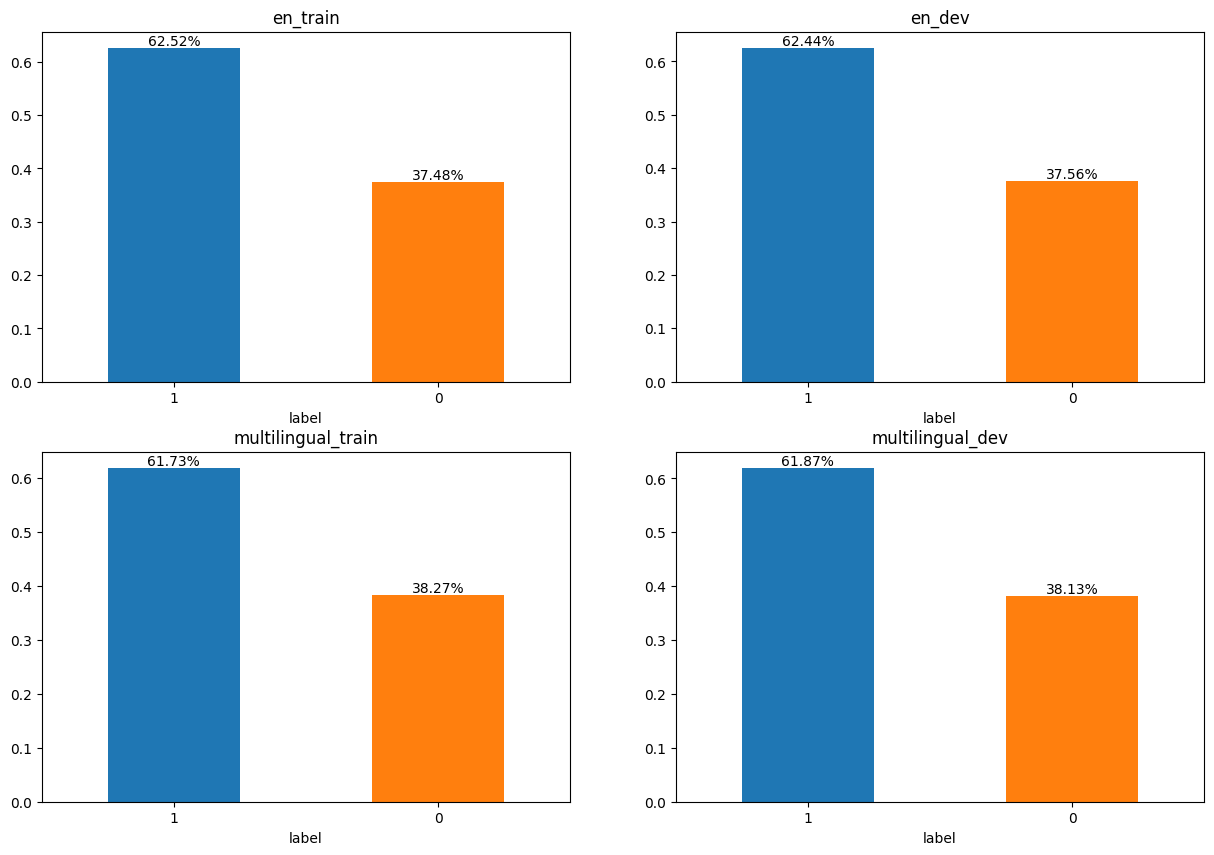

In [24]:
# Plot the distribution of labels in the datasets in percentage
import matplotlib.pyplot as plt

color = tuple(["tab:blue", "tab:orange"])

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

pd_en_train['label'].value_counts(normalize=True).plot(
    kind='bar', ax=axs[0, 0], title='en_train', rot=0, color=color
)
pd_en_dev['label'].value_counts(normalize=True).plot(
    kind='bar', ax=axs[0, 1], title='en_dev', rot=0, color=color
)

pd_multilingual_train['label'].value_counts(normalize=True).plot(
    kind='bar', ax=axs[1, 0], title='multilingual_train', rot=0, color=color
)
pd_multilingual_dev['label'].value_counts(normalize=True).plot(
    kind='bar', ax=axs[1, 1], title='multilingual_dev', rot=0, color=color
)

# Loop through each bar in the graph and add the percentage value
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height() * 100:.2f}%',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 5),
            textcoords='offset points',
        )

plt.show()

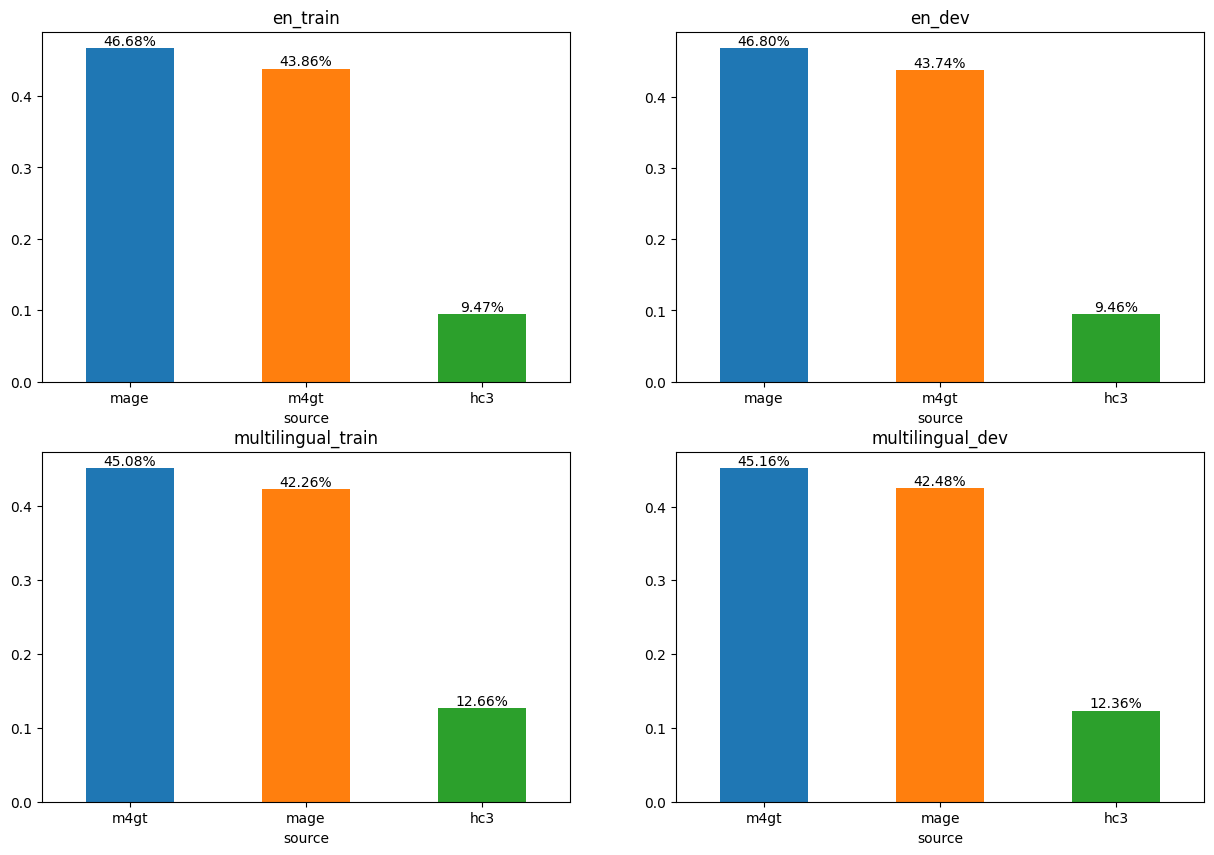

In [31]:
# Plot the distribution of source in the datasets in percentage
import matplotlib.pyplot as plt

color = tuple(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"])

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

pd_en_train['source'].value_counts(normalize=True).plot(
    kind='bar', ax=axs[0, 0], title='en_train', rot=0, color=color
)
pd_en_dev['source'].value_counts(normalize=True).plot(
    kind='bar', ax=axs[0, 1], title='en_dev', rot=0, color=color
)

pd_multilingual_train['source'].value_counts(normalize=True).plot(
    kind='bar', ax=axs[1, 0], title='multilingual_train', rot=0, color=color
)
pd_multilingual_dev['source'].value_counts(normalize=True).plot(
    kind='bar', ax=axs[1, 1], title='multilingual_dev', rot=0, color=color
)

# Loop through each bar in the graph and add the percentage value
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height() * 100:.2f}%',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 5),
            textcoords='offset points',
        )

plt.show()

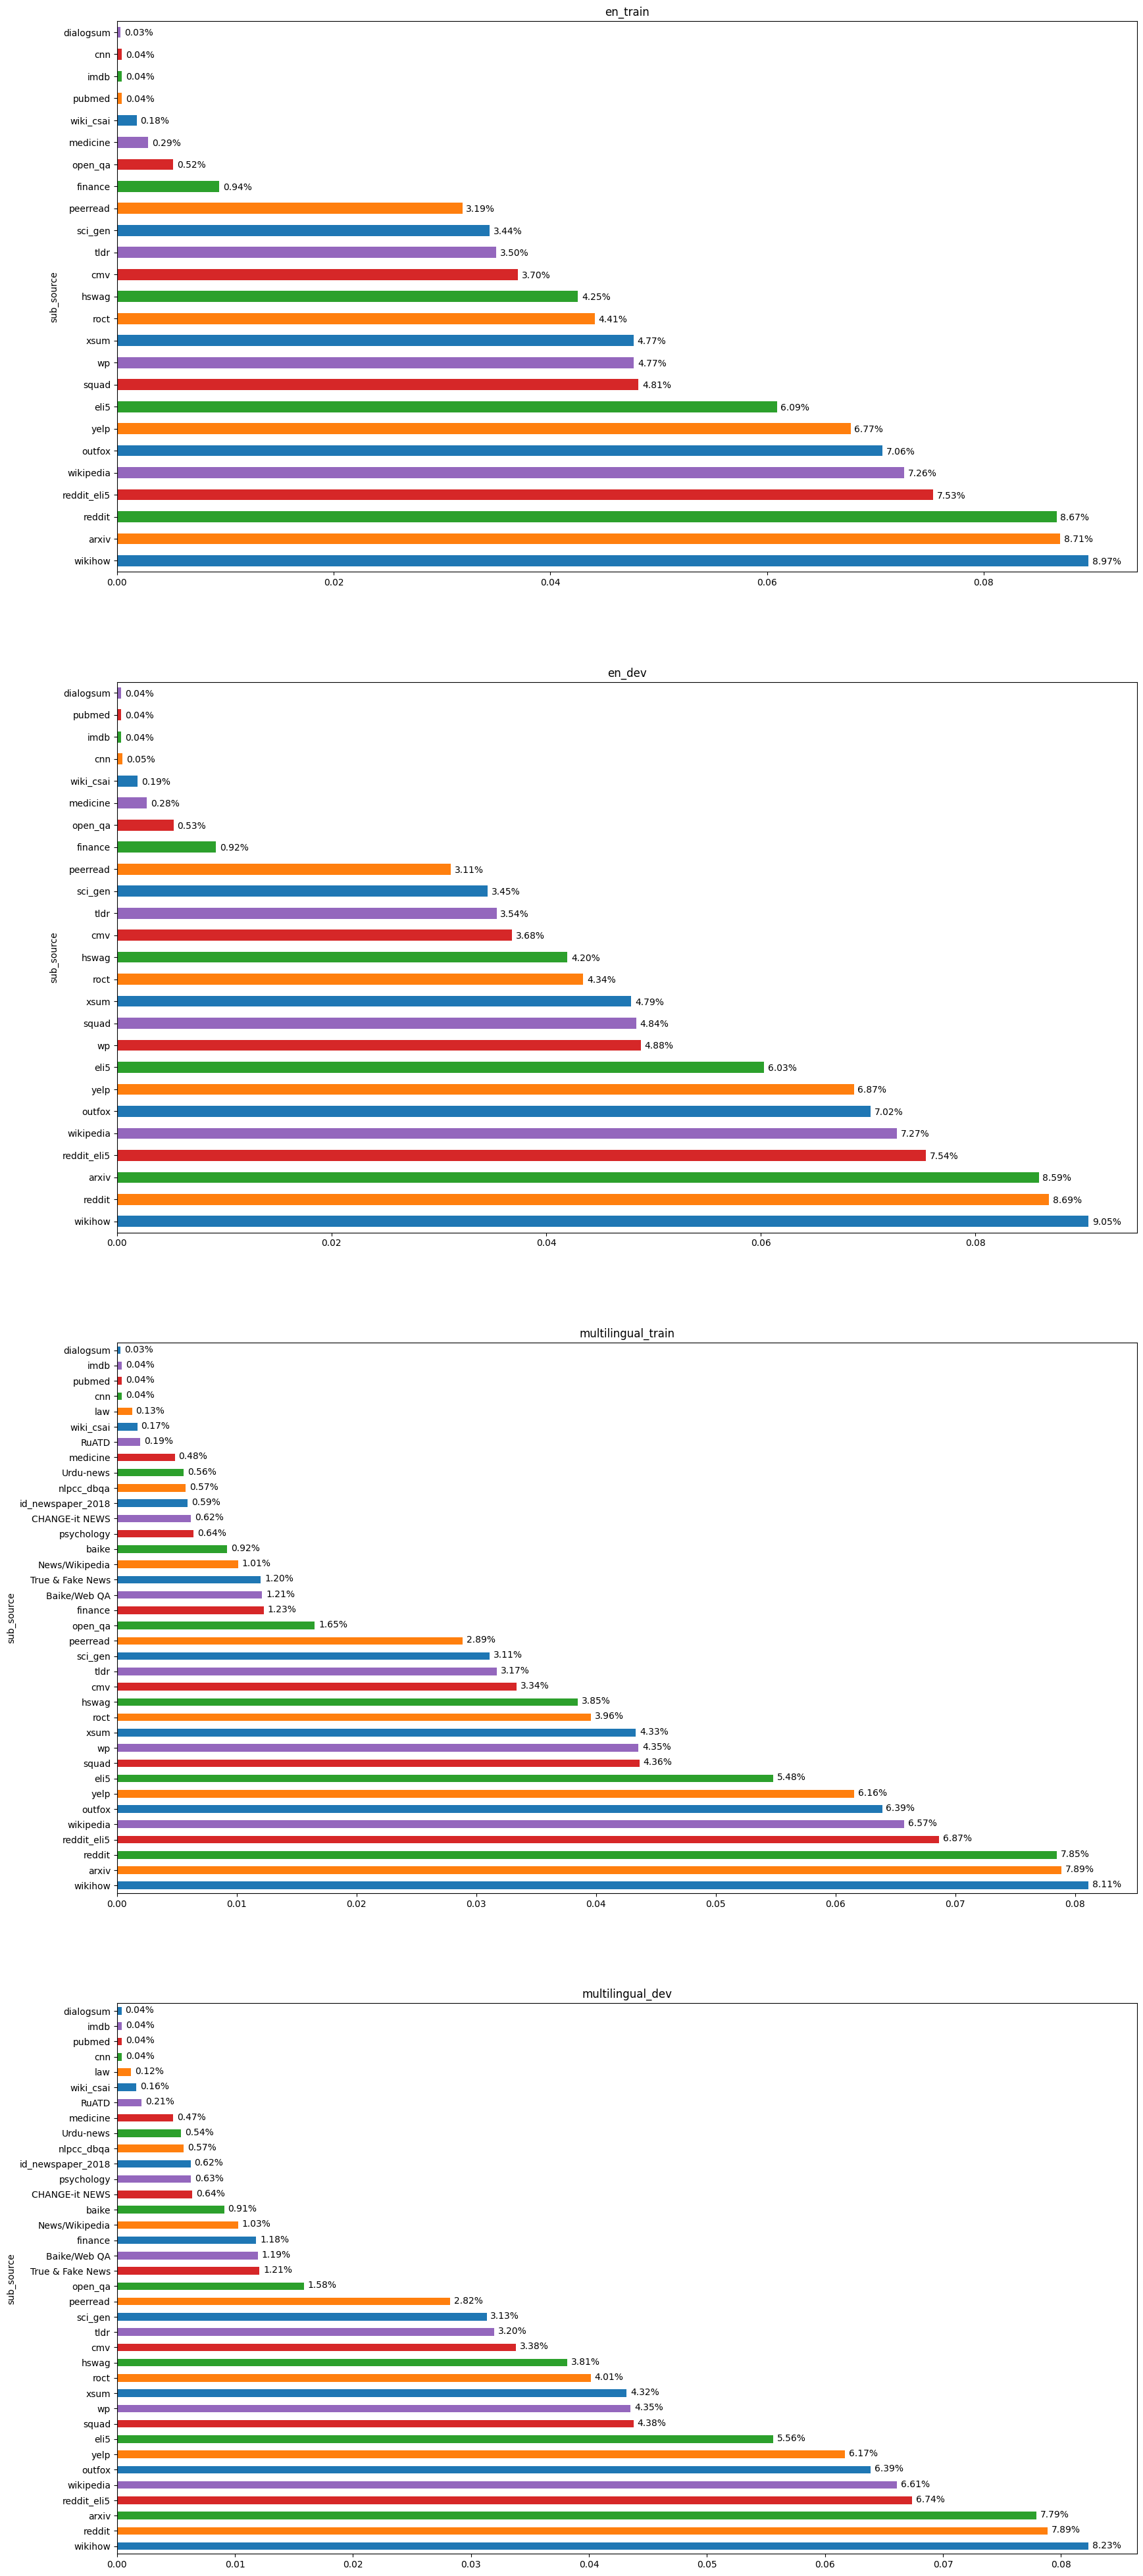

In [104]:
# Plot the distribution of sub_source in the datasets in percentage
import matplotlib.pyplot as plt

color = tuple(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"])

fig, axs = plt.subplots(4, 1, figsize=(20, 50))

pd_en_train['sub_source'].value_counts(normalize=True).plot(
    kind='barh', ax=axs[0], title='en_train', rot=0, color=color
)
pd_en_dev['sub_source'].value_counts(normalize=True).plot(
    kind='barh', ax=axs[1], title='en_dev', rot=0, color=color
)

pd_multilingual_train['sub_source'].value_counts(normalize=True).plot(
    kind='barh', ax=axs[2], title='multilingual_train', rot=0, color=color
)
pd_multilingual_dev['sub_source'].value_counts(normalize=True).plot(
    kind='barh', ax=axs[3], title='multilingual_dev', rot=0, color=color
)

# Loop through each bar in the graph and add the percentage value
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(
            f'{p.get_width() * 100:.2f}%',
            (p.get_x() + p.get_width(), p.get_y()),
            ha='center',
            va='center',
            xytext=(20, 5),
            textcoords='offset points',
        )

plt.show()

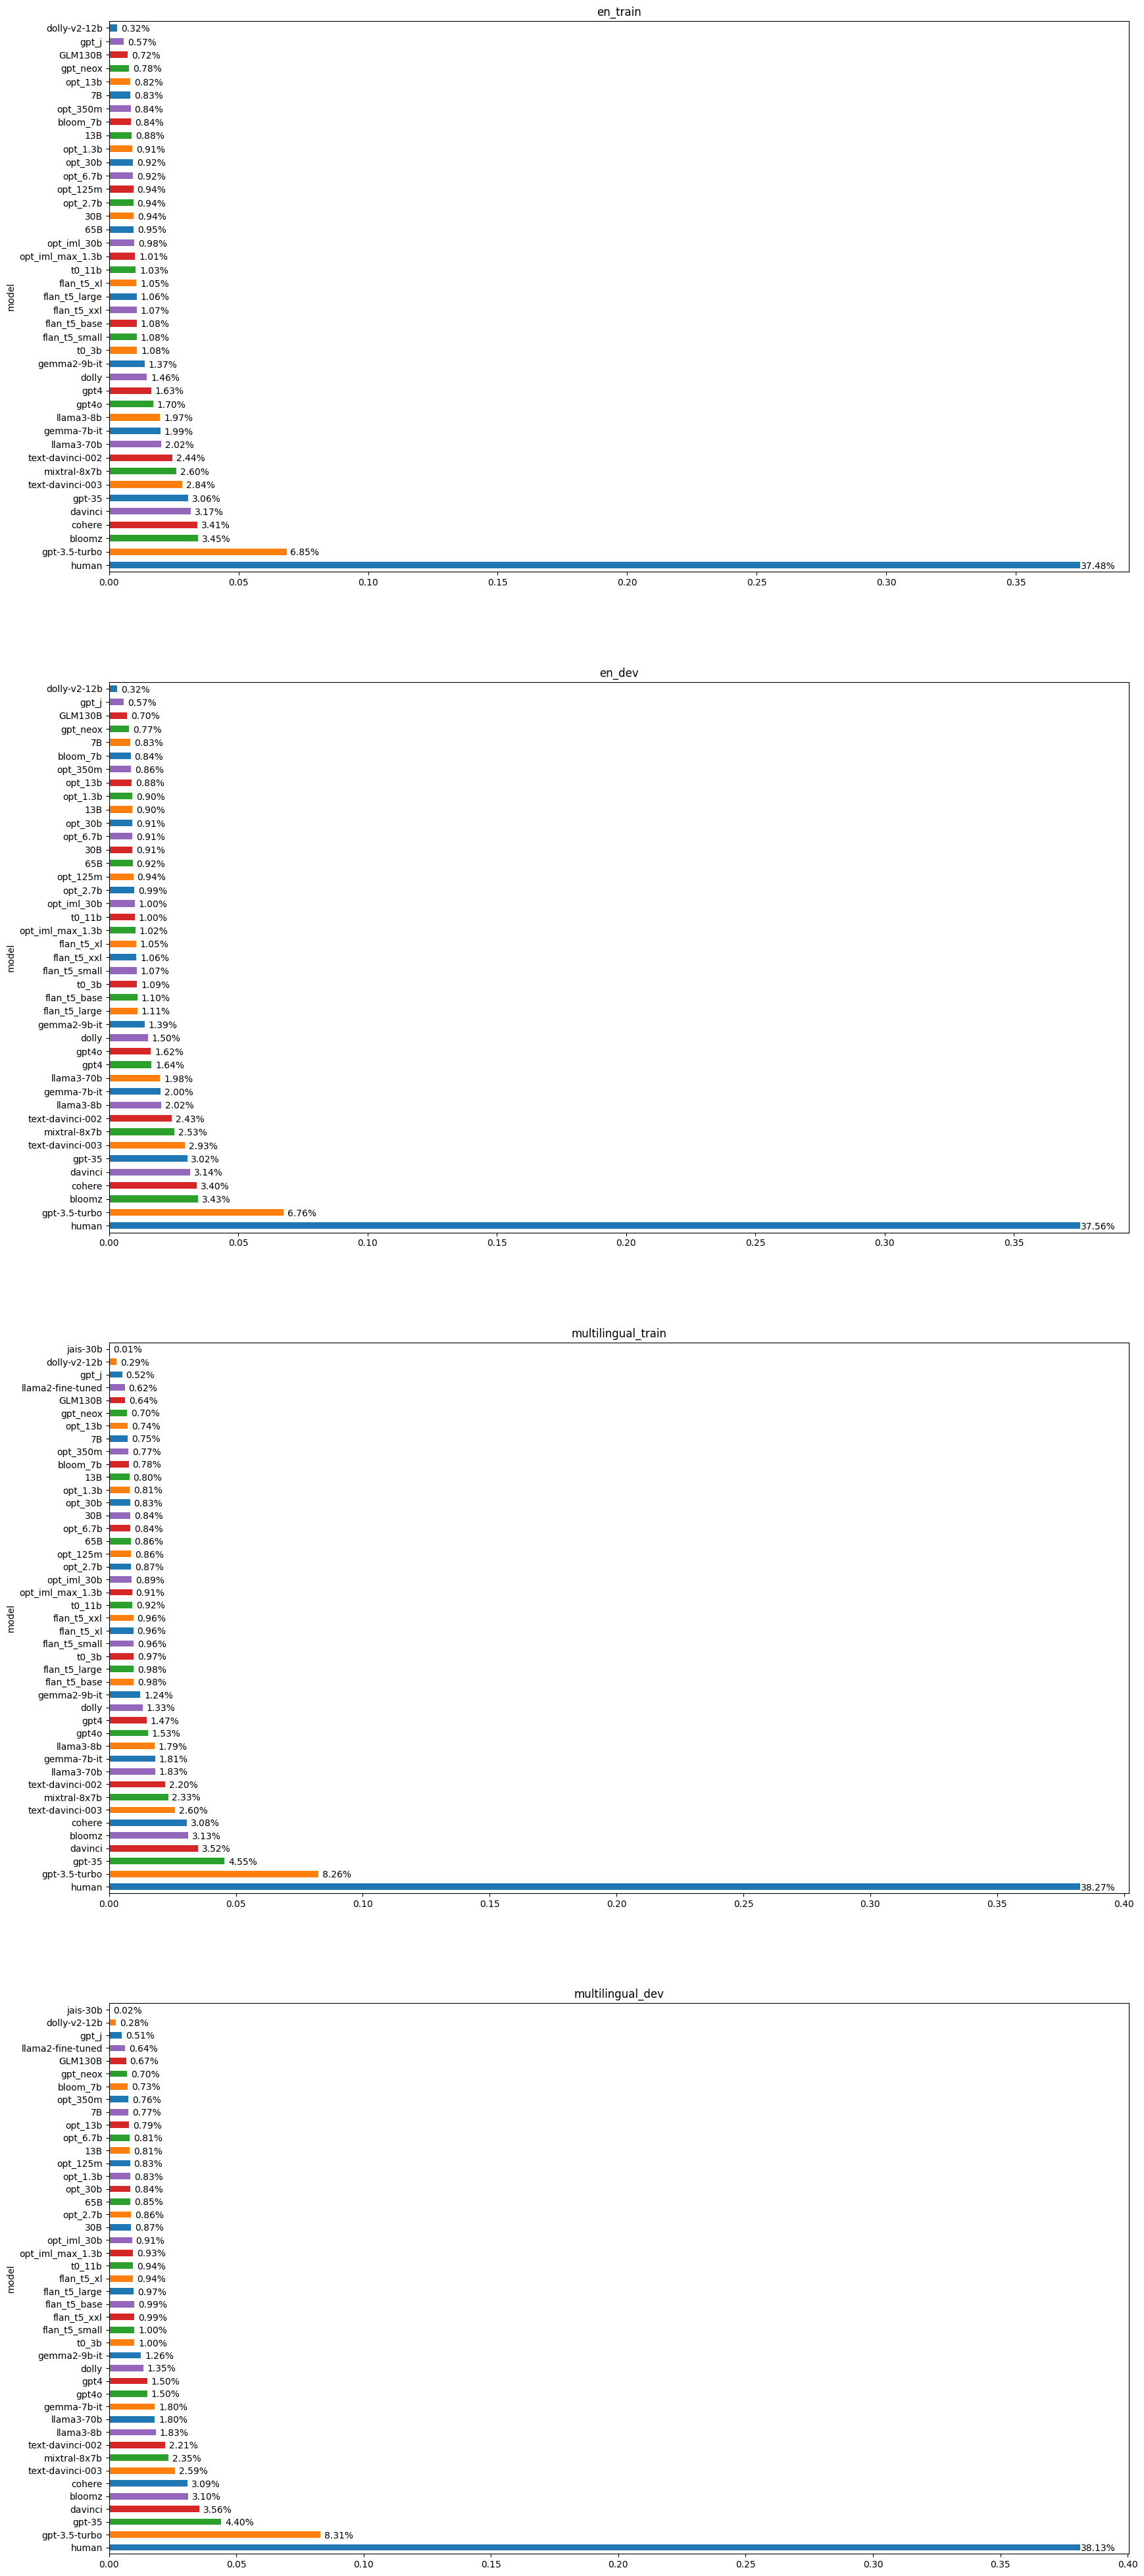

In [105]:
# Plot the distribution of model in the datasets in percentage
import matplotlib.pyplot as plt

color = tuple(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"])

fig, axs = plt.subplots(4, 1, figsize=(20, 50))

pd_en_train['model'].value_counts(normalize=True).plot(
    kind='barh', ax=axs[0], title='en_train', rot=0, color=color
)
pd_en_dev['model'].value_counts(normalize=True).plot(
    kind='barh', ax=axs[1], title='en_dev', rot=0, color=color
)

pd_multilingual_train['model'].value_counts(normalize=True).plot(
    kind='barh', ax=axs[2], title='multilingual_train', rot=0, color=color
)
pd_multilingual_dev['model'].value_counts(normalize=True).plot(
    kind='barh', ax=axs[3], title='multilingual_dev', rot=0, color=color
)

# Loop through each bar in the graph and add the percentage value
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(
            f'{p.get_width() * 100:.2f}%',
            (p.get_x() + p.get_width(), p.get_y()),
            ha='center',
            va='center',
            xytext=(20, 2.5),
            textcoords='offset points',
        )

plt.show()

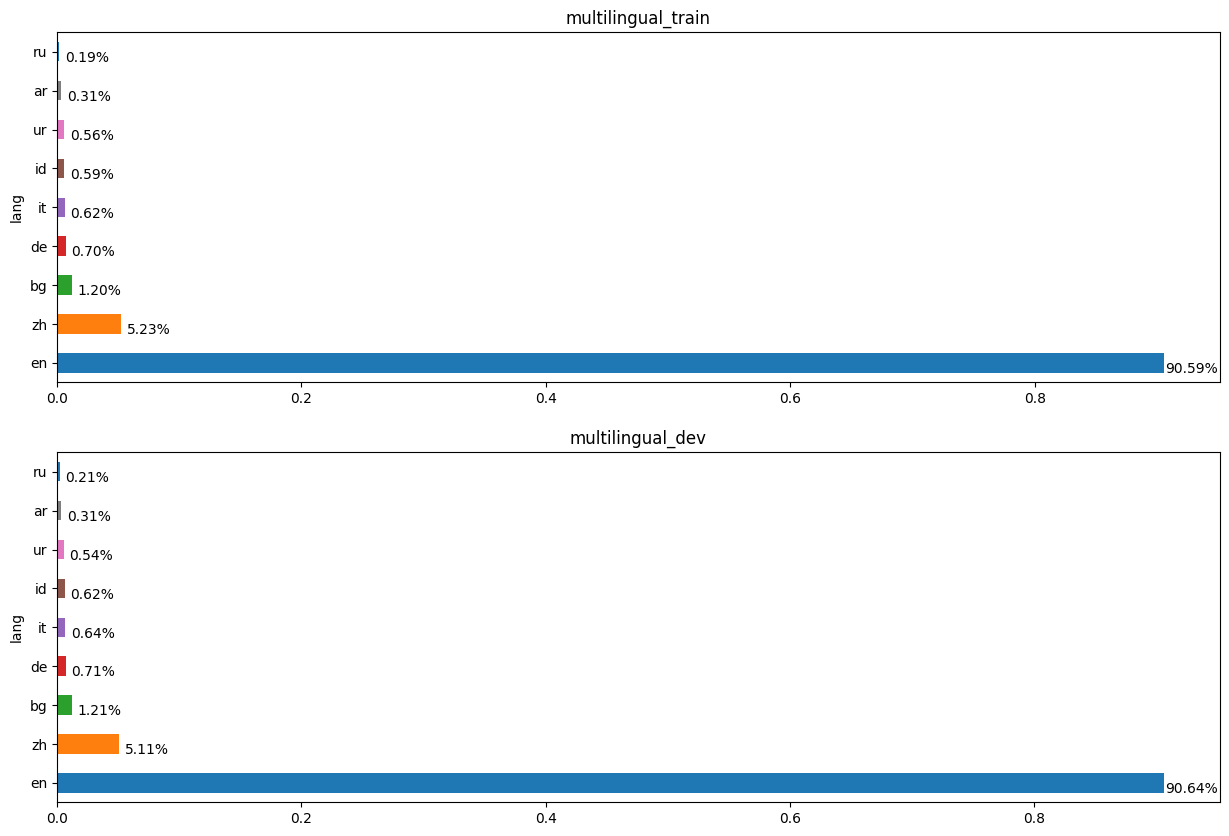

In [109]:
# Plot the distribution over languages in the datasets in percentage
import matplotlib.pyplot as plt

color = tuple(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray"])

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

pd_multilingual_train['lang'].value_counts(normalize=True).plot(
    kind='barh', ax=axs[0], title='multilingual_train', rot=0, color=color
)
pd_multilingual_dev['lang'].value_counts(normalize=True).plot(
    kind='barh', ax=axs[1], title='multilingual_dev', rot=0, color=color
)

# Loop through each bar in the graph and add the percentage value
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(
            f'{p.get_width() * 100:.2f}%',
            (p.get_x() + p.get_width(), p.get_y()),
            ha='center',
            va='center',
            xytext=(20, 2.5),
            textcoords='offset points',
        )

plt.show()